In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris, load_diabetes
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import (
    KFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:

iris = load_iris()
X=iris.data
y=iris.target

In [2]:
iris_data = pd.DataFrame(iris["data"], columns=iris["feature_names"])
name_map = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}
iris_data["class"] = [name_map[k] for k in iris["target"]]
iris_data.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=17
)


In [4]:


model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)  # Обучение трейновой выборке
y_pred = model.predict(X_test)  # Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))


0.9130434782608695
0.9055555555555556


<Axes: >

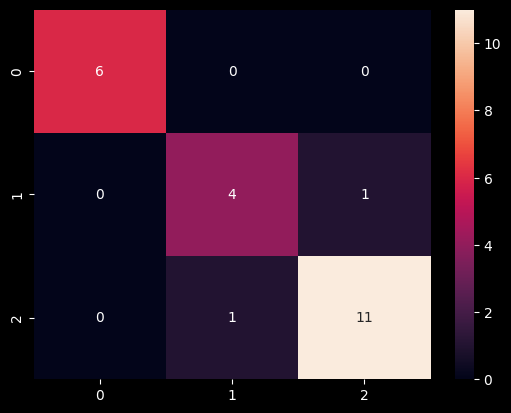

In [5]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=0
)
model = LogisticRegression()
model.fit(X_train, y_train)  # Обучение трейновой выборке
y_pred = model.predict(X_test)  # Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))


1.0
1.0


<Axes: >

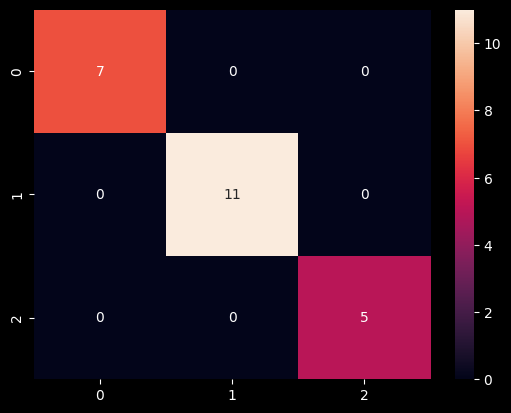

In [7]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=8
)
model = LogisticRegression()
model.fit(X_train, y_train)  # Обучение трейновой выборке
y_pred = model.predict(X_test)  # Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))


0.8695652173913043
0.8745098039215686


<Axes: >

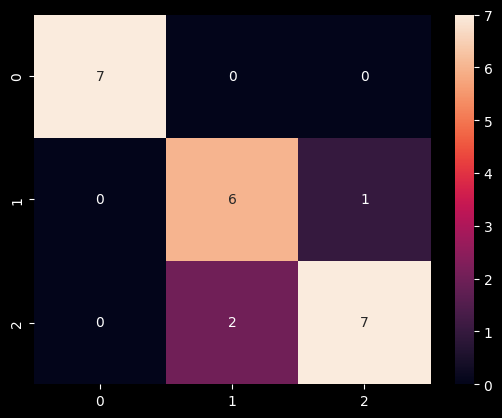

In [9]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [11]:
kf = KFold(n_splits=3, shuffle=True, random_state=15)
kf


KFold(n_splits=3, random_state=15, shuffle=True)

In [13]:
metrics_accuracy = []
metrics_f1 = []
model = LogisticRegression(solver="liblinear")

for train_index, test_index in kf.split(y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(accuracy_score(y_test, y_pred))
    metrics_f1.append(f1_score(y_test, y_pred, average="macro"))


In [157]:
print(
    "Значения метрики accuracy: {} \nЗначения метрики f1: {}".format(
        metrics_accuracy, metrics_f1
    )
)
print("Среднее по кросс-валидации: ", np.array(metrics_f1).mean())

Значения метрики accuracy: [0.0, 0.8, 0.8, 0.8, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.8, 0.8, 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.8, 0.8, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 0.6, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 0.8, 1.0, 1.0, 0.6, 0.8, 1.0, 0.8, 0.8, 0.6, 0.4, 0.6, 0.4, 0.4, 0.4, 0.4, 0.4, 0.8, 0.6, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 0.6, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 0.8, 1.0, 1.0, 0.6, 0.8, 1.0, 0.8, 0.8, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 0.6, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 0.8, 1.0, 1.0, 0.6, 0.8, 1.0, 0.4, 0.4, 0.4, 0.8, 0.8, 0.8, 0.8, 0.8, 0.4, 0.4, 0.8, 0.8, 1.0, 0.8, 0.8, 0.4, 0.8, 0.8, 1.0, 0.8, 0.8, 0.8, 0.8, 1.0, 0.8, 0.8, 1.0, 1.0, 1.

## Stratified k-Fold
Метод stratified k-Fold — это метод k-Fold, использующий стратификацию при разбиении на фолды: каждый фолд содержит примерно такое же соотношение классов, как и всё исходное множество. Такой подход может потребоваться в случае, например, очень несбалансированного соотношения классов.

Создаём стратифицированное k-блочное разбиение (StratifiedKFold):

In [154]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=15)
skf.get_n_splits(X, y)

3

Выполняем кросс-валидацию с помощью функции cross_val_score:

In [156]:
cv_results = cross_val_score(
    model,  # модель
    X,  # матрица признаков
    y,  # вектор цели
    cv=skf,  # тип разбиения
    scoring="f1_macro",  # метрика
    n_jobs=-1,
)  # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())


Кросс-валидация:  [1.         1.         0.92046784]
Среднее по кросс-валидации:  0.9734892787524366


## Leave-one-out
Метод leave-one-out (LOO) является частным случаем метода k-Fold: в нём каждый фолд состоит ровно из одного семпла.

Создаём разбиение:

In [158]:
loo = LeaveOneOut()
cv_results = cross_val_score(
    model,  # модель
    X,  # матрица признаков
    y,  # вектор цели
    cv=loo,  # тип разбиения
    scoring="f1_macro",  # метрика
    n_jobs=-1,
)  # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())


Кросс-валидация:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Среднее по кросс-валидации:  0.9533333333333334


---
# Вопросы
1) Зачем нужно применять кросс-валидацию?
    - Чтобы исключить влияние разбития датасета на тестовую и обучающую выборки на значения метрик
2) В чём заключается процесс кросс-валидации?
    - Данные бьются на k частей, k-1 из которых становятся тренировочными, и одна тестовой
3) В чем достоинства и недостатки каждого метода кросс-валидации?
    - `Stratified k-Fold` - Отношение количества классов в тестовой и тренировочной выборках будут примерно равны.
    - `Leave-one-out` - В каждом из фолдов ровно один сэмпл
4) Какой метод кросс-валидации можно применять на данных с большим дисбалансом классов?
    - `Stratified k-Fold`
5) Можно ли бороться с недообучением при помощи кросс-валидации? А с переобучением?
    - Нет?
6) Какие основные типы разбиений данных используются при кросс-валидации?
    - `k-Fold`
    - `Stratified k-Fold`
    - `Leave-one-out`
7) Какой тип кросс-валидации можно применять если нужно сделать очень большое количество проходов?
    - `Leave-one-out`

# Дополнительные номера

## №1
Изучите разбиение Leave-P-Out. Продемонстрируйте работу этого алгоритма на примере из лабораторной работы.

In [151]:
# 5 - количество наблюдений в наборе
leave_p_out = LeavePOut(p=5)
metrics_accuracy = []
metrics_f1 = []
model = LogisticRegression(solver="liblinear")

small_X = pd.DataFrame(X.copy())
small_y = pd.Series(y.copy())
for i in np.unique(y):
    mask = small_y[small_y == i].index[5:]
    small_X = small_X.drop(mask)
    small_y = small_y.drop(mask)

small_y = small_y.reset_index(drop=True)
small_X = small_X.reset_index(drop=True)

for i, (train_index, test_index) in enumerate(leave_p_out.split(small_y)):
    X_train, X_test = small_X.iloc[train_index], small_X.iloc[test_index]
    y_train, y_test = small_y.iloc[train_index], small_y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(accuracy_score(y_test, y_pred))
    metrics_f1.append(f1_score(y_test, y_pred, average="macro"))


Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Fold 11
Fold 12
Fold 13
Fold 14
Fold 15
Fold 16
Fold 17
Fold 18
Fold 19
Fold 20
Fold 21
Fold 22
Fold 23
Fold 24
Fold 25
Fold 26
Fold 27
Fold 28
Fold 29
Fold 30
Fold 31
Fold 32
Fold 33
Fold 34
Fold 35
Fold 36
Fold 37
Fold 38
Fold 39
Fold 40
Fold 41
Fold 42
Fold 43
Fold 44
Fold 45
Fold 46
Fold 47
Fold 48
Fold 49
Fold 50
Fold 51
Fold 52
Fold 53
Fold 54
Fold 55
Fold 56
Fold 57
Fold 58
Fold 59
Fold 60
Fold 61
Fold 62
Fold 63
Fold 64
Fold 65
Fold 66
Fold 67
Fold 68
Fold 69
Fold 70
Fold 71
Fold 72
Fold 73
Fold 74
Fold 75
Fold 76
Fold 77
Fold 78
Fold 79
Fold 80
Fold 81
Fold 82
Fold 83
Fold 84
Fold 85
Fold 86
Fold 87
Fold 88
Fold 89
Fold 90
Fold 91
Fold 92
Fold 93
Fold 94
Fold 95
Fold 96
Fold 97
Fold 98
Fold 99
Fold 100
Fold 101
Fold 102
Fold 103
Fold 104
Fold 105
Fold 106
Fold 107
Fold 108
Fold 109
Fold 110
Fold 111
Fold 112
Fold 113
Fold 114
Fold 115
Fold 116
Fold 117
Fold 118
Fold 119
Fold 120
Fold 121
Fold 122
Fol

In [153]:
print(f"F1_mean: {np.mean(metrics_f1)}")
print(f"Accuracy_mean: {np.mean(metrics_accuracy)}")
# Модель не очень точная, так как для обучения использовалось мало данных, иначе бы ушло слишком много времени

F1_mean: 0.7144231429945715
Accuracy_mean: 0.7324009324009323


## №2 
Изучите функцию cross_validate(). Продемонстрируйте работу этой функции на тех же данных.

In [166]:
cv_results = cross_validate(
    model,  # модель
    X,  # матрица признаков
    y,  # вектор цели
    cv=kf,  # тип разбиения
    scoring="f1_macro",  # метрика
    n_jobs=-1,
)  # используются все ядра CPU

pprint(cv_results)

{'fit_time': array([0.00201488, 0.00300121, 0.00099969]),
 'score_time': array([0.00098634, 0.00200152, 0.00299931]),
 'test_score': array([0.95955882, 0.96296296, 0.89065256])}


## №3
Оцените при помощи кросс-валидации другие метрики эффективности для этой же модели.

In [52]:
metrics = [
    "accuracy",
    "f1_macro",
    "max_error",
    "r2",
]
metric_res = {"Кросс-валидация": [], "Среднее": []}

for metric in metrics:
    cv_results = cross_val_score(model, X, y, cv=kf, scoring=metric, n_jobs=-1)
    metric_res["Кросс-валидация"].append(list(map(lambda x: round(x, 4), cv_results)))
    metric_res["Среднее"].append(cv_results.mean())

pd.DataFrame(metric_res, index=metrics)


,Кросс-валидация,Среднее
accuracy,"[0.96, 0.96, 0.9]",0.940000
f1_macro,"[0.9596, 0.963, 0.8907]",0.937725
max_error,"[-1, -1, -1]",-1.000000
r2,"[0.9394, 0.9351, 0.8608]",0.911755


## №4
Сравните кросс-валидированные результаты работы нескольких моделей на одних и тех же данных.

In [77]:
for model_class in (
    LinearDiscriminantAnalysis,
    LogisticRegression,
    GaussianNB,
    KNeighborsClassifier,
    SVC,
    DecisionTreeClassifier,
):
    model = model_class()
    cv_results = cross_val_score(model, X, y, cv=kf, scoring="accuracy", n_jobs=-1)
    print(model_class.__name__)
    print("  Кросс-валидация: ", cv_results)
    print("  Среднее по кросс-валидации: ", cv_results.mean())
    print()


LinearDiscriminantAnalysis
  Кросс-валидация:  [1.   0.98 0.94]
  Среднее по кросс-валидации:  0.9733333333333333

LogisticRegression
  Кросс-валидация:  [1.   0.94 0.94]
  Среднее по кросс-валидации:  0.96

GaussianNB
  Кросс-валидация:  [1.   0.94 0.9 ]
  Среднее по кросс-валидации:  0.9466666666666667

KNeighborsClassifier
  Кросс-валидация:  [0.94 0.92 0.96]
  Среднее по кросс-валидации:  0.94

SVC
  Кросс-валидация:  [0.96 0.94 0.96]
  Среднее по кросс-валидации:  0.9533333333333333

DecisionTreeClassifier
  Кросс-валидация:  [0.9  0.9  0.92]
  Среднее по кросс-валидации:  0.9066666666666667



In [70]:
model = LogisticRegression().fit(X, y)
accuracy_score(y, model.predict(X))


c:\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

## №5
Повторите анализ на другом датасете: встроенном наборе данных о диабете.

In [177]:
dataset = load_diabetes()
X = pd.DataFrame(dataset.data)
y = pd.Series(dataset.target)

In [219]:
kf = KFold(n_splits=10, shuffle=True, random_state=15)
metrics = [
    "max_error",
    "r2",
]
metric_res = {"Кросс-валидация": [], "Среднее": []}
model = RandomForestRegressor()
for metric in metrics:
    cv_results = cross_val_score(model, X, y, cv=kf, scoring=metric, n_jobs=-1)
    metric_res["Кросс-валидация"].append(list(map(lambda x: round(x, 4), cv_results)))
    metric_res["Среднее"].append(cv_results.mean())

pd.DataFrame(metric_res, index=metrics)


,Кросс-валидация,Среднее
max_error,"[-138.77, -128.37, -156.72, -156.79, -184.38, ...",-144.6690
r2,"[0.3594, 0.4369, 0.4733, 0.435, 0.2273, 0.3245...",0.4153


## №6
Сделайте k-блочную перекрёстную проверку (KFold) модели логистической регрессии, предварительно стандартизировав данные.

Для этого создайте конвейер с помощью make_pipeline из библиотеки sklearn.pipeline, который будет стандартизировать, а затем выполнять логистическую регрессию.

In [233]:
kf = KFold(n_splits=10, shuffle=True, random_state=15)
metrics = [
    "max_error",
    "r2",
]
metric_res = {"Кросс-валидация": [], "Среднее": []}
model = LogisticRegression()
for metric in metrics:
    cv_results = cross_val_score(model, X, y, cv=kf, scoring=metric, n_jobs=-1)
    metric_res["Кросс-валидация"].append(list(map(lambda x: round(x, 4), cv_results)))
    metric_res["Среднее"].append(cv_results.mean())

pd.DataFrame(metric_res, index=metrics)


,Кросс-валидация,Среднее
max_error,"[-190.0, -207.0, -169.0, -152.0, -158.0, -269....",-186.500000
r2,"[-0.003, -1.3615, -0.4121, 0.2274, -0.3554, -1...",-0.482827


In [236]:
model = make_pipeline(StandardScaler(), LogisticRegression())

kf = KFold(n_splits=10, shuffle=True, random_state=15)
metrics = [
    "max_error",
    "r2",
]
metric_res = {"Кросс-валидация": [], "Среднее": []}
for metric in metrics:
    cv_results = cross_val_score(model, X, y, cv=kf, scoring=metric, n_jobs=-1)
    metric_res["Кросс-валидация"].append(list(map(lambda x: round(x, 4), cv_results)))
    metric_res["Среднее"].append(cv_results.mean())

pd.DataFrame(metric_res, index=metrics)


,Кросс-валидация,Среднее
max_error,"[-187.0, -168.0, -158.0, -151.0, -148.0, -166....",-177.20000
r2,"[0.1, -0.0881, 0.4062, 0.0697, 0.1939, -0.122,...",0.08734
